<a href="https://colab.research.google.com/github/Rodrigoveloso7/Exerc-cio-classifica-o-manuten-o-preditiva/blob/main/An%C3%A1lise_manuten%C3%A7%C3%A3o_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

In [204]:
dados = pd.read_csv('/content/predictive_maintenance.csv')

In [205]:
dados

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [206]:
dados_sem_failure_type = dados.drop('Failure Type',axis =1)
dados_sem_failure_type

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,M14860,M,298.1,308.6,1551,42.8,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0


In [207]:
correlacao = dados.corr()

<ipython-input-207-342f6f39f4e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


<Axes: >

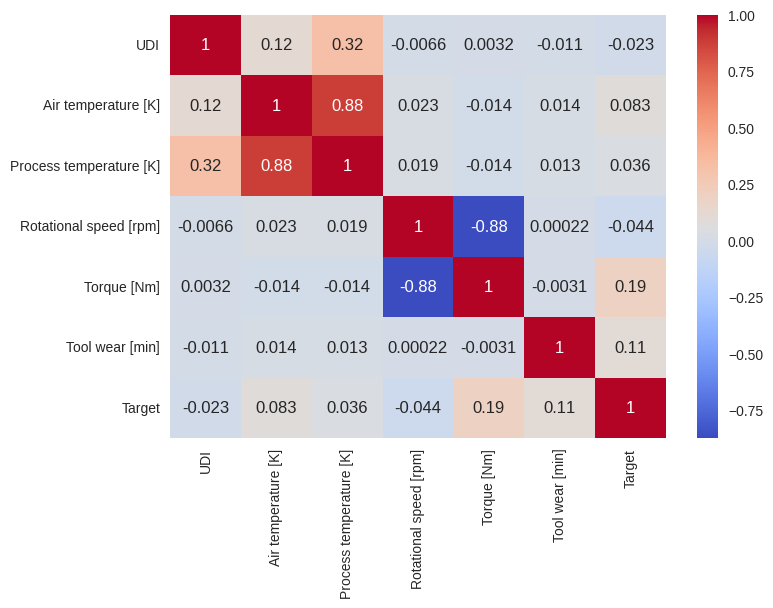

In [208]:
sns.heatmap(correlacao,annot=True,
    cmap='coolwarm')

In [209]:
dados.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

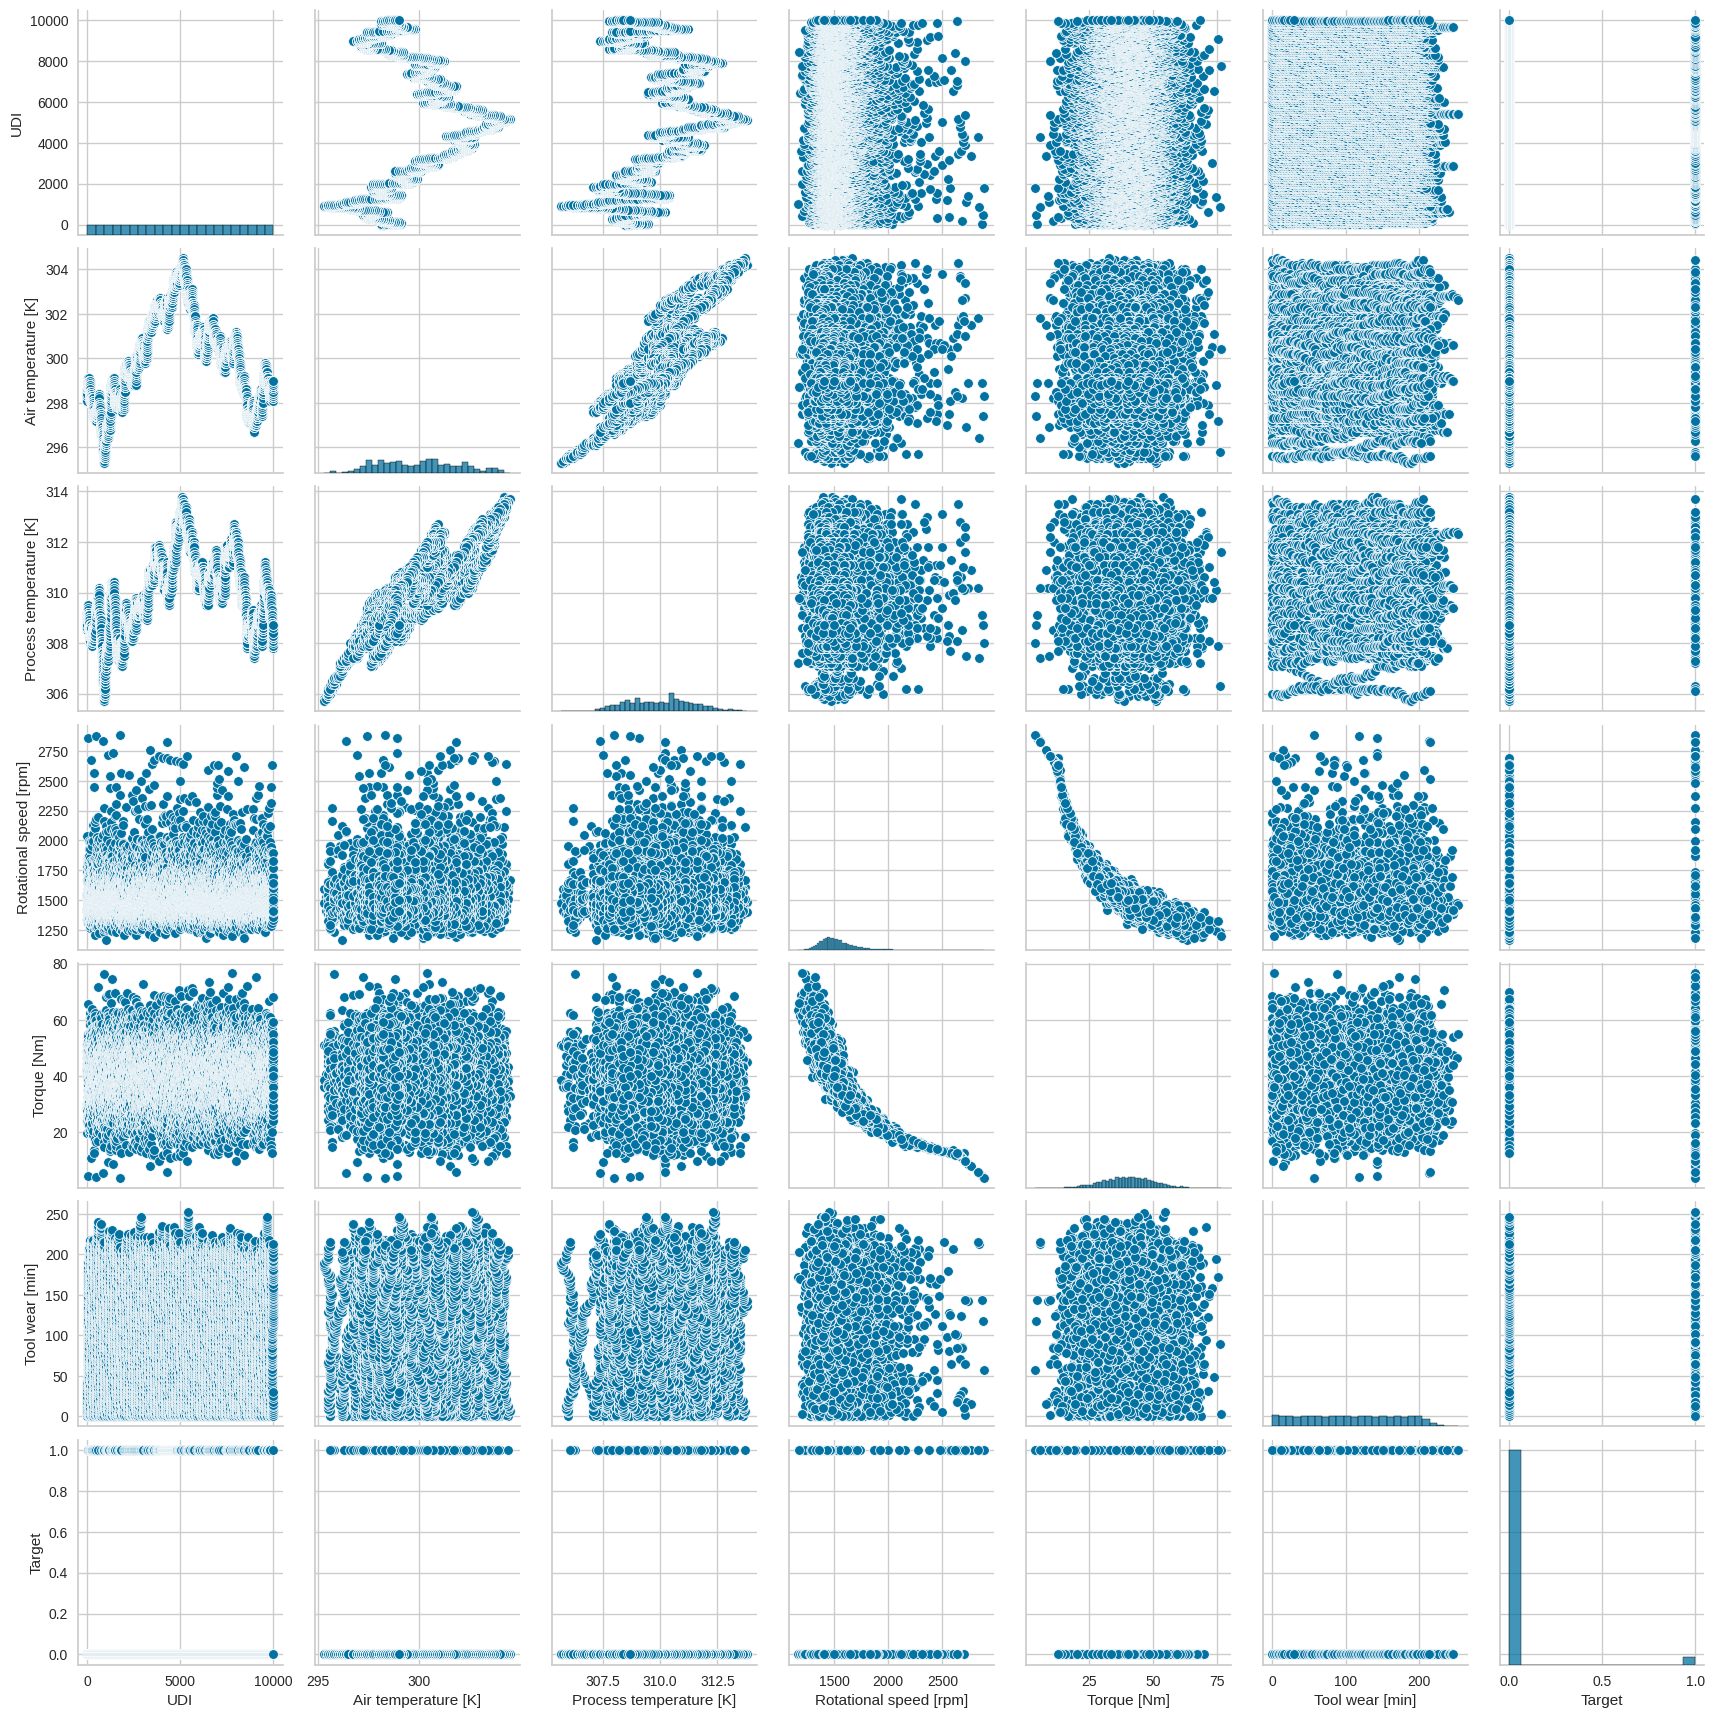

In [210]:
sns.pairplot(dados)

In [211]:
atrib_com_product_id = dados_sem_failure_type.drop(['UDI','Target'],axis=1)
atrib_com_product_id

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,M14860,M,298.1,308.6,1551,42.8,0
1,L47181,L,298.2,308.7,1408,46.3,3
2,L47182,L,298.1,308.5,1498,49.4,5
3,L47183,L,298.2,308.6,1433,39.5,7
4,L47184,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...
9995,M24855,M,298.8,308.4,1604,29.5,14
9996,H39410,H,298.9,308.4,1632,31.8,17
9997,M24857,M,299.0,308.6,1645,33.4,22
9998,H39412,H,299.0,308.7,1408,48.5,25


In [212]:
target_com_product_id = dados[['Target']]
target_com_product_id

,Target
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [213]:
label_encoder_uid = LabelEncoder()
label_encoder_product = LabelEncoder()
atrib_com_product_id.iloc[:,0] = label_encoder_uid.fit_transform(atrib_com_product_id.iloc[:,0])
atrib_com_product_id.iloc[:,1] = label_encoder_product.fit_transform(atrib_com_product_id.iloc[:,1])

<ipython-input-213-6d64e53da911>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  atrib_com_product_id.iloc[:,0] = label_encoder_uid.fit_transform(atrib_com_product_id.iloc[:,0])
<ipython-input-213-6d64e53da911>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  atrib_com_product_id.iloc[:,1] = label_encoder_product.fit_transform(atrib_com_product_id.iloc[:,1])


In [214]:
scaler_atrib_product = StandardScaler()
scaler_target_product = StandardScaler()
atrib_product_scaler = scaler_atrib_product.fit_transform(atrib_com_product_id)

In [215]:
# onehotencoder_atrib = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1])], remainder='passthrough')
# atrib_com_product_id = onehotencoder_atrib.fit_transform(atrib_com_product_id).toarray()


In [216]:
atrib_com_product_treinamento, atrib_com_product_teste, target_com_product_treinamento, target_com_product_teste = train_test_split(atrib_product_scaler,target_com_product_id, test_size=0.3, random_state = 0)

In [217]:

classificador_com_product = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',)

In [218]:
classificador_com_product.fit(atrib_com_product_treinamento,target_com_product_treinamento)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.81535207
Iteration 2, loss = 0.43063759
Iteration 3, loss = 0.27824995
Iteration 4, loss = 0.21397530
Iteration 5, loss = 0.18344008
Iteration 6, loss = 0.16621727
Iteration 7, loss = 0.15453632
Iteration 8, loss = 0.14569141
Iteration 9, loss = 0.13850408
Iteration 10, loss = 0.13237546
Iteration 11, loss = 0.12717198
Iteration 12, loss = 0.12234838
Iteration 13, loss = 0.11832771
Iteration 14, loss = 0.11484789
Iteration 15, loss = 0.11177731
Iteration 16, loss = 0.10932073
Iteration 17, loss = 0.10717252
Iteration 18, loss = 0.10516602
Iteration 19, loss = 0.10356831
Iteration 20, loss = 0.10210621
Iteration 21, loss = 0.10082605
Iteration 22, loss = 0.09930948
Iteration 23, loss = 0.09827410
Iteration 24, loss = 0.09728889
Iteration 25, loss = 0.09612731
Iteration 26, loss = 0.09505420
Iteration 27, loss = 0.09434303
Iteration 28, loss = 0.09340025
Iteration 29, loss = 0.09233666
Iteration 30, loss = 0.09142955
Iteration 31, loss = 0.09105172
Iteration 32, los

MLPClassifier(max_iter=1500, tol=1e-05, verbose=True)

In [219]:
# from sklearn.svm import SVC
# svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
# svm_credit.fit(atrib_com_product_treinamento,target_com_product_treinamento)
# previsoes = svm_credit.predict(atrib_com_product_teste)
# previsoes

In [220]:
previsoes_com_product = classificador_com_product.predict(atrib_com_product_teste)

In [221]:
previsoes_com_product

array([0, 0, 0, ..., 0, 0, 0])

In [222]:
accuracy_score(target_com_product_teste,previsoes_com_product)

0.9813333333333333

In [228]:
print(classification_report(target_com_product_teste, previsoes_com_product))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2901
           1       0.84      0.54      0.65        99

    accuracy                           0.98      3000
   macro avg       0.91      0.77      0.82      3000
weighted avg       0.98      0.98      0.98      3000



0.9813333333333333

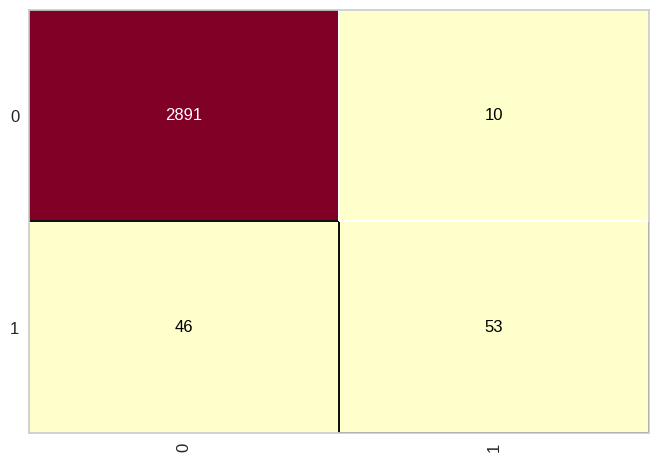

In [231]:
cm = ConfusionMatrix(classificador_com_product)
cm.fit(atrib_com_product_treinamento,target_com_product_treinamento)
cm.score(atrib_com_product_teste, target_com_product_teste)